# Libraries

In [40]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data import

In [3]:
df_purchase = pd.read_csv('purchase data.csv')

# data exploration

In [4]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [ ]:
#descriptive statistics is not useful or appropriate b/c we dont have equal number of records per customer or an equal numbe ro f
#of records per day

In [5]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [ ]:
# Data preprocessing is important since we had checked there is no missing value we will simply move

# Data Segmentation

## Import Segmentation Model

In [8]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [9]:
pca = pickle.load(open('pca.pickle','rb'))

In [7]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [11]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

# Pca


In [13]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
#it may contain duplicates because customer has many transaction

# kmeans pca

In [14]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [15]:
# new data frame for copy of dataframe purchase
df_purchase_predictor = df_purchase.copy()

In [17]:
df_purchase_predictor['Segment'] = purchase_segm_kmeans_pca

# Descriptive analysis by segment

## data analysis by customer

In [18]:
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [ ]:
#create data frame with one record per individual summarize customer pirchsing behaviour

In [22]:
temp1 = df_purchase_predictor[['ID','Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_visits'})
temp1.head()

# we have counted number of times customer visited the store

,N_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [28]:
temp2 = df_purchase_predictor[['ID','Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2.rename(columns = {'Incidence': 'Purchase'})
temp3 = temp1.join(temp2)
temp3.head()


,N_visits,Incidence
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [29]:
temp3['Average N purchase'] = temp3['Incidence']/temp3['N_visits']
temp3.head()

,N_visits,Incidence,Average N purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [30]:
temp4 = df_purchase_predictor[['ID','Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
# to get the exact segement we have not take sum we have taken mean

In [32]:
df_purchase_descr.head()

,N_visits,Incidence,Average N purchase,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


# Segment Proportions

In [45]:
segm_prop = df_purchase_descr[['Incidence','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]    
segm_prop = segm_prop.rename(columns = {'Incidence':'Segment_Proportions' })
segm_prop.head()

,Segment_Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


Text(0.5, 1.0, 'Segment proportions')

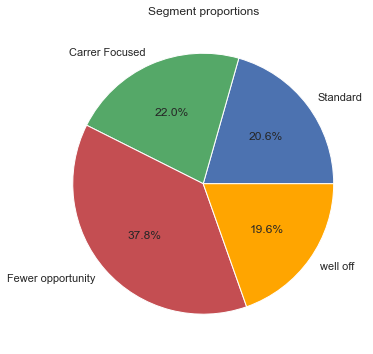

In [47]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment_Proportions'],
       labels = ['Standard','Carrer Focused','Fewer opportunity','well off'],
       autopct = '%1.1f%%',
       colors = ('b','g','r','orange'))

plt.title('Segment proportions')



In [ ]:
# this pie chart shows the visitors are mainly belong to which segment

# Purchase occasion and purchase incidence


In [ ]:
#how often diff seggment people visit shop ow often they buy diff candy bar how often they buy relative to their visit

In [48]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_visits,Incidence,Average N purchase
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [50]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std


,N_visits,Incidence,Average N purchase
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


In [ ]:
#how often people from diff seg visit store

Text(0.5, 1.0, 'Average numbet of store visit by segment')

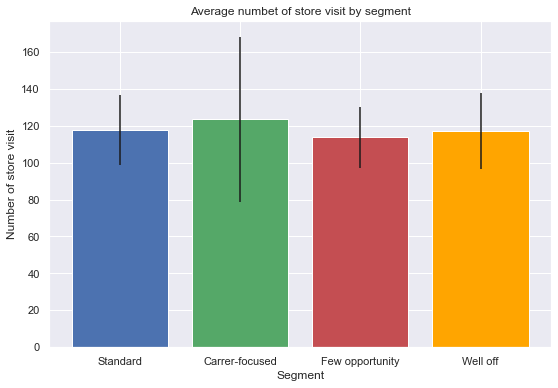

In [53]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label = ('Standard','Carrer-focused','Few opportunity','Well off'),
       height = segments_mean['N_visits'],
       yerr = segments_std['N_visits'],
       color = ('b','g','r','orange'))
                
plt.xlabel('Segment')
plt.ylabel('Number of store visit')
plt.title('Average numbet of store visit by segment')

In [ ]:
#vertical line shows the dispersion of data point 
#career focused visits the most
#std deviation from carrer focused is mre it means they are not visiting frequently
#rest three are similar in purchases

Text(0.5, 1.0, 'Number of purchase by segment')

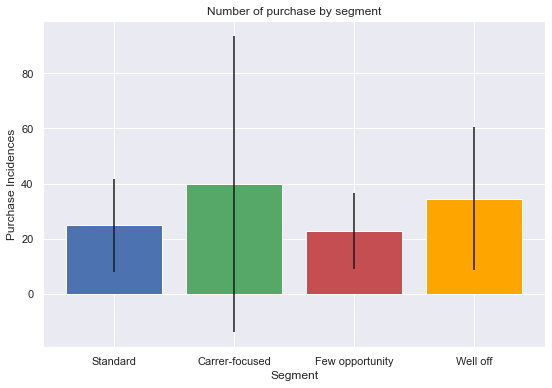

In [55]:
#how often the client buys a product
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label = ('Standard','Carrer-focused','Few opportunity','Well off'),
       height = segments_mean['Incidence'],
       yerr = segments_std['Incidence'],
       color = ('b','g','r','orange'))
                
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of purchase by segment')

In [ ]:
#2 one buys product more often 
#std deviation is high b/c some part buys more and some part least
#income is same but their spending pattern is different

# Brand Choice

In [ ]:
#which brand is customer going to choose
#focus on customers who bougt atleast one candy bar
#incidence = purchase occur

In [56]:
df_purchase_incidence = df_purchase_predictor[df_purchase_predictor['Incidence'] == 1]
#df purchase predictor contain segment
#this incidence df contains purchased segment

In [57]:
#we need to aggregate data for diff brand 
#try to create col for each brand

brand_dumies = pd.get_dummies(df_purchase_incidence['Brand'],prefix = 'Brand', prefix_sep = '_')
brand_dumies['Segment'],brand_dumies['ID'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dumies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [58]:
temp = brand_dumies.groupby(['ID'],as_index= True).mean()

In [59]:
mean_brand_choice = temp.groupby(['Segment'],as_index= True).mean()

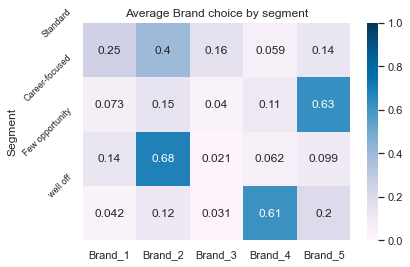

In [61]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3],['Standard','Career-focused','Few opportunity','well off'],rotation = 45, fontsize = 9) 
plt.title('Average Brand choice by segment')
plt.show()

In [ ]:
#brands are ordered from cheapest to costliest brand 
#63% of carer focused buy brand 5 ehich is costliest
#they want luxury status
#well off section go for brand 4

# Revenue

In [ ]:
#we will calculate revenues for each brand and in total by segment

In [141]:
temp = df_purchase_predictor[df_purchase_predictor['Brand'] == 1]
#it contais the purchases for brand 1
temp.loc[:,'Revenue Brand 1'] = temp['Price_1']*temp['Quantity']
#only one brand is bought at transaction time
segements_brand_revenue = pd.DataFrame()
segements_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index = False).sum()
segements_brand_revenue

C:\Users\HP\AppData\Local\Temp\ipykernel_17468\2551435187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 1'] = temp['Price_1']*temp['Quantity']


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [142]:
temp = df_purchase_predictor[df_purchase_predictor['Brand'] == 2]
#it contais the purchases for brand 2
temp.loc[:,'Revenue Brand 2'] = temp['Price_2']*temp['Quantity']
segements_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index = False).sum()  

segements_brand_revenue

C:\Users\HP\AppData\Local\Temp\ipykernel_17468\4231290704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 2'] = temp['Price_2']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [143]:
temp = df_purchase_predictor[df_purchase_predictor['Brand'] == 3]
#it contais the purchases for brand 3
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segements_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index = False).sum()

segements_brand_revenue

C:\Users\HP\AppData\Local\Temp\ipykernel_17468\3395613246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2611.19,4768.52,3909.17
1,1,736.09,1746.42,664.75
2,2,2258.90,13955.14,716.25
3,3,699.47,1298.23,731.35


In [144]:
temp = df_purchase_predictor[df_purchase_predictor['Brand'] == 4]
#it contais the purchases for brand 4
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segements_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index = False).sum()

segements_brand_revenue

C:\Users\HP\AppData\Local\Temp\ipykernel_17468\1838087483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2611.19,4768.52,3909.17,861.38
1,1,736.09,1746.42,664.75,2363.84
2,2,2258.90,13955.14,716.25,1629.31
3,3,699.47,1298.23,731.35,14185.57


In [145]:
temp = df_purchase_predictor[df_purchase_predictor['Brand'] == 5]
#it contais the purchases for brand 5
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segements_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index = False).sum()
segements_brand_revenue


C:\Users\HP\AppData\Local\Temp\ipykernel_17468\3184576465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [146]:
 segements_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [147]:
segements_brand_revenue['Total'] =  (segements_brand_revenue['Revenue Brand 1'] +
                                          segements_brand_revenue['Revenue Brand 2'] +
                                          segements_brand_revenue['Revenue Brand 3'] +
                                          segements_brand_revenue['Revenue Brand 4'] +
                                          segements_brand_revenue['Revenue Brand 5'])
segements_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [148]:
segm_prop

,Segment_Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


In [149]:
segements_brand_revenue['Segment Proportion'] = segm_prop['Segment_Proportions']

In [157]:
segements_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total,Segment Proportion
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career Focus,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Few opportunity,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [ ]:
# carrer focused are buying expensive brands
#brand 4 could increase its price bc their customer have not affected by price 